<a href="https://colab.research.google.com/github/DostdarDost/Generative-AI-Model/blob/main/Generative_Model_For_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generative AI Model


## Preprocessing Time Series Data
#### 1. Univeriate data set

Time Series data holds a lot of information, but generally, it is not visible. The common problems associated with time series are un-ordered timestamps, missing values (or timestamps), outliers, and noise in the data. Of all the mentioned problems, handling the missing values is the most difficult one. Since the conventional imputation (A technique used to take care of the missing data by replacing the missing values to retain most of the information) methods are not applicable while working with the time series data. To analyze the real-time analysis of this preprocessing
dataset for click here https://www.kaggle.com/datasets/rakannimer/air-passengers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('C:/Users/fvcds/Desktop/150$/Project/AirPassengers.csv')
df.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


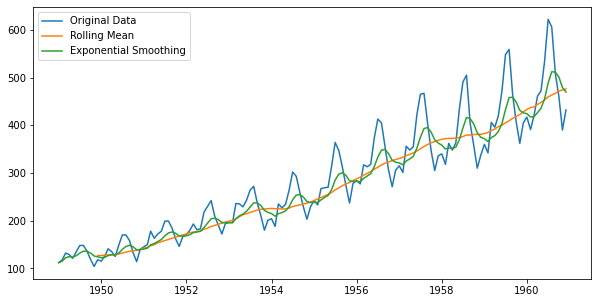

In [ ]:
# Resample the data to a specific frequency
df = df.resample('MS').sum()

# Fill missing values with a specified value or method
df = df.fillna(method='ffill')

# Remove outliers using the interquartile range (IQR) method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Smooth the data using a rolling average or exponential smoothing
df['rolling_mean'] = df['#Passengers'].rolling(window=12).mean()
df['exponential_smoothing'] = df['#Passengers'].ewm(alpha=0.2).mean()

# Visualize the original and preprocessed data
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['#Passengers'], label='Original Data')
plt.plot(df.index, df['rolling_mean'], label='Rolling Mean')
plt.plot(df.index, df['exponential_smoothing'], label='Exponential Smoothing')
plt.legend(loc='best')
plt.show()


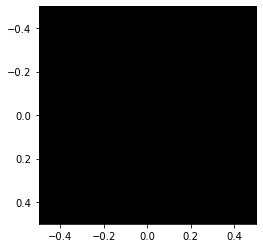

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import pdist, squareform
# Normalize data
scaler = MinMaxScaler()
data = scaler.fit_transform(df[['#Passengers']])

# Convert to two-dimensional matrix
matrix = np.transpose(data)

# Calculate distance matrix
distances = pdist(matrix, metric='euclidean')
distance_matrix = squareform(distances)

# Create recurrence plot
plt.imshow(distance_matrix, cmap='gray')
plt.show()

In [ ]:
distance_matrix

array([[0.]])

### 2. Multivarate dataset
#### Algroithm 1
##### Time series dataset to Images dateset using Reccurenc plot and apply CNN model

For analysis you can download dataset https://www.kaggle.com/datasets/atulanandjha/national-stock-exchange-time-series


In [ ]:
import pandas as pd
data = pd.read_csv('C:/Users/fvcds/Desktop/150$/Project/infy_stock.csv')
data.head(5)


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
1,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
3,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
4,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


To get columns from a dataset and create a subset, you can use the square bracket notation to select the columns of interest. For example, to create a subset of your df DataFrame with only seleted columns, you can do:

In [ ]:
subset = data[['Date', 'Open','High', 'Low','Close', 'Volume']]
subset.head(5)
# Print the shapes of data and subset
print('Data:', data.shape)
print('subset:', subset.shape)

Data: (248, 15)
subset: (248, 6)


In [ ]:
subset['Date'] = pd.to_datetime(subset['Date'])
subset.set_index('Date', inplace=True)
subset.head(5)


<ipython-input-4-fd58749938b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Date'] = pd.to_datetime(subset['Date'])


,Open,High,Low,Close,Volume
Date,,,,,
2015-01-01,1968.95,1982.00,1956.9,1974.40,500691
2015-01-02,1972.00,2019.05,1972.0,2013.20,1694580
2015-01-05,2009.90,2030.00,1977.5,1995.90,2484256
2015-01-06,1980.00,1985.00,1934.1,1954.20,2416829
2015-01-07,1965.00,1974.75,1950.0,1963.55,1812479


In [ ]:
subset.isna()

,Date,Open,High,Low,Close,Volume
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
243,False,False,False,False,False,False
244,False,False,False,False,False,False
245,False,False,False,False,False,False
246,False,False,False,False,False,False


In [ ]:
subset.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

NameError: name 'plt' is not defined

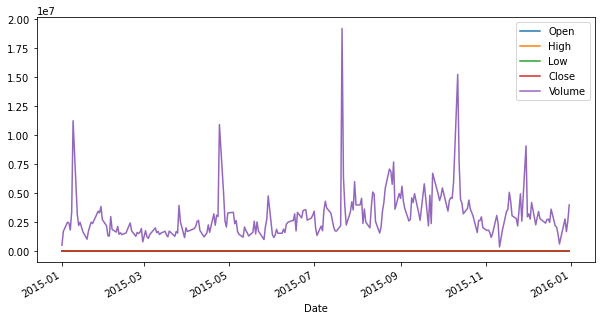

In [ ]:
# Plot all variables
subset.plot(figsize=(10, 5))
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize data
scaler = MinMaxScaler()
data = scaler.fit_transform(subset[['Open', 'High', 'Low', 'Close', 'Volume']])

In [ ]:
df = subset[[ 'Open','High', 'Low','Close', 'Volume']]
df.head(5)
#
print('df:', df.shape)

df: (248, 5)


In [ ]:
from pyts.image import RecurrencePlot
# Convert each time series into a recurrence plot
rp = RecurrencePlot(threshold='point', percentage=20)
rp_images = []
labels = []
for i in range(1, len(df)):
    time_series = df.iloc[i].values
    rp_image = rp.fit_transform(time_series.reshape(1, -1))[0]
    rp_images.append(rp_image)
    # Assign label based on some condition (e.g. whether the stock price goes up or down)
    if df['Close'][i] > df['Close'][i-1]:
        labels.append(1)
    else:
        labels.append(0)


# Convert list of images and labels to numpy arrays
rp_images = np.array(rp_images)
labels = np.array(labels)
# Save the image dataset
np.save('image_data.npy', rp_images)
np.save('labels.npy', labels)

In [ ]:
print(rp_images.shape)


(247, 5, 5)


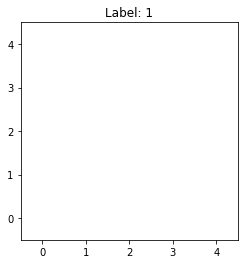

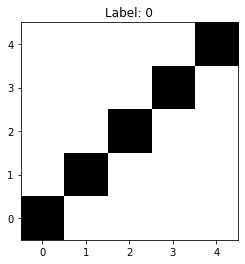

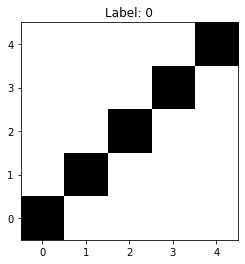

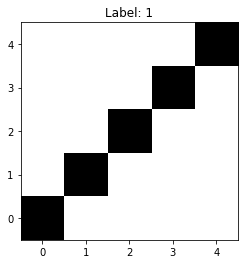

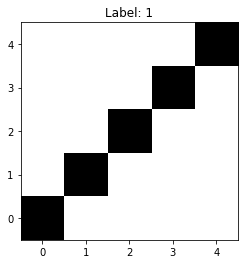

In [ ]:
import matplotlib.pyplot as plt

# Show the first 5 images
for i in range(5):
    plt.imshow(rp_images[i], cmap='binary', origin='lower')
    plt.title('Label: {}'.format(labels[i]))
    plt.show()


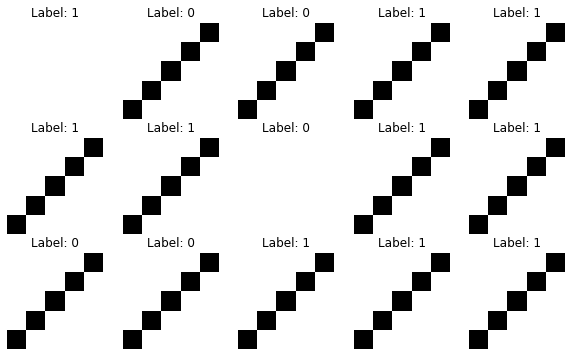

In [ ]:
import matplotlib.pyplot as plt

# Show the first 15 images in a grid
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(10,6))
for i, ax in enumerate(axes.flat):
    ax.imshow(rp_images[i], cmap='binary', origin='lower')
    ax.set_title('Label: {}'.format(labels[i]))
    ax.axis('off')
plt.show()


In [ ]:
import numpy as np

# Load the image data
X = np.load('image_data.npy')

# Load the labels
y = np.load('labels.npy')

# Print the shapes of X and y
print('X shape:', X.shape)
print('y shape:', y.shape)


X shape: (247, 5, 5)
y shape: (247,)


To split the dataset into train and test sets, we can use the train_test_split function from the scikit-learn library. Here's an example of how to split the data with 80% for training and 20% for testing:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train',X_train.shape)
print('y_train', y_train.shape)
X_train.shape[1]
X_train.shape[2]
X_train.shape[0]

X_train (197, 5, 5)
y_train (197,)


197

### Define CNN model and Train

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model architecture
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(5,5,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
5/5 [==============================] - 5s 117ms/step - loss: 2.3808 - accuracy: 0.0510 - val_loss: 2.3312 - val_accuracy: 0.0500
Epoch 2/10
5/5 [==============================] - 0s 20ms/step - loss: 2.3013 - accuracy: 0.1274 - val_loss: 2.2486 - val_accuracy: 0.5750
Epoch 3/10
5/5 [==============================] - 0s 15ms/step - loss: 2.2250 - accuracy: 0.5032 - val_loss: 2.1683 - val_accuracy: 0.5750
Epoch 4/10
5/5 [==============================] - 0s 14ms/step - loss: 2.1519 - accuracy: 0.5032 - val_loss: 2.0924 - val_accuracy: 0.5750
Epoch 5/10
5/5 [==============================] - 0s 13ms/step - loss: 2.0818 - accuracy: 0.5032 - val_loss: 2.0186 - val_accuracy: 0.5750
Epoch 6/10
5/5 [==============================] - 0s 15ms/step - loss: 2.0128 - accuracy: 0.5032 - val_loss: 1.9452 - val_accuracy: 0.5750
Epoch 7/10
5/5 [==============================] - 0s 14ms/step - loss: 1.9441 - accuracy: 0.5032 - val_loss: 1.8727 - val_accuracy: 0.5750
Epoch 8/10
5/5 [==========

### Prediction

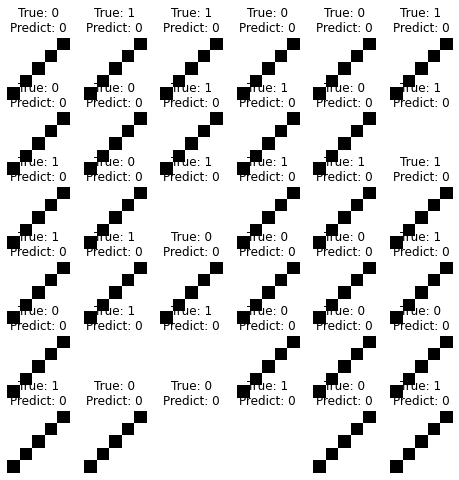

In [ ]:
# Visualize the classification results
y_pred = model.predict(X_test).flatten()
plt.figure(figsize=(8, 8))
for i in range(min(36, X_test.shape[0])):
    plt.subplot(6, 6, i+1)
    plt.imshow(X_test[i], cmap='binary', origin='lower')
    plt.title('True: %s\nPredict: %s' % (y_test[i], round(y_pred[i])))
    plt.axis('off')
plt.show()